## Predicting Malicious Websites Using Machine Learning Techniques

### Table of Contents
> 1. <a href='#inro'>Introduction</a><br>
> 2. <a href='#data_dic'>Data Dictionary</a><br>
> 3. <a href='#project_objective'>Project Objective</a><br>
> 4. <a href='#data_wrangling'>Data Wrangling</a><br>
> 5.  <a href='#assessing_data'>Assessing Data</a><br>
> 6. <a href='#data_cleaning'>Data Cleaning </a><br>
> 7. <a href='#eda'>Exploratory Data Analysis</a><br>
> 8. <a href='#mlapplication'>Machine Learning Application</a><br>
> 9. <a href='#Conclusion'>Conclusion</a>


<a id='inro'></a>
### Introduction
> In the vast growing global Internet, there exist billions of websites and it's often hard to Identify which websites are malicious and which ones are safe to use. According to [SecurityWeek](https://www.securityweek.com/185-million-websites-infected-malware-any-time/), "There are more than `1.86 billion` websites on the internet. Around `1%` of these -- something like 18,500,000 -- are infected with malware at a given time each week;  while the average website is attacked `44 times` every day".

> The said websites pose a variety of risks and compromises to users, which includes stealling of accounts information, personal data, financial records and the collapse of small businesses or big organization. However, one of the ways to circumvent the problem is to leverage on th power of `Machine Learning` by taking some of the characteristics or features of the website, analyse them and perhaps use them to predict if a potential website is free to use or not.<br>
> The research use `Decision Tree` and `XGBoost` algorithms to classifier a website to either `Malicious` or `Benign`.

<a id='project_objective'></a>
### Project Objective
> The objective this project is to use supervise or classifier algorithms to classify website into either `Malicious` (`Type=1`) or `Benign` (`Type=0`) using the various features given in the dataset

<a id='data_dic'></a>
### Data Dictionary 
There are `1781` reocrds and `21` columns in the dataset, and below are the columns. The datset used in this research can be found in [Kaggle website](https://www.kaggle.com/datasets/xwolf12/malicious-and-benign-websites)
> 1. `URL:` This is the anonimous identification of the `URL` analyzed in the research.
> 2. `URL_LENGTH:` This is the number of characters in the `URL`.
> 3. `NUMBER_SPECIAL_CHARACTERS:` Thi is the number of special characters identified in the URL, such as, `“/”`, `“%”`, `“#”`, `“&”`, `“. “` and `“=”`.
> 4.  `CHARSET:` This is a categorical value and its represent the `character encoding standard` (also called character set).
> 5. `SERVER:` The is a categorical value and it is the operative system of the server got from the packet response.
> 6. `CONTENT_LENGTH:` it represents the content size of the HTTP header.
> 7. `WHOIS_COUNTRY:` This is a categorical variable, its values are the countries from the server response.
> 8. `WHOIS_STATEPRO:` This is a categorical variable, its values are the states from the server response.
> 9. `WHOIS_REGDATE:` This is the registration date for the `URL`, with format of `DD/MM/YYY HH:MM`.
> 10. `WHOIS_UPDATED_DATE:` This is the last `URL` updated date.
> 11. `TCP_CONVERSATION_EXCHANGE:` This variable represent the number of `TCP` packets exchanged between the `server` and our `honeypot client`.
> 12. `DIST_REMOTE_TCP_PORT:` This is the number of ports detected and different to `TCP`
> 13. `REMOTE_IPS:` This is the total number of `IPs` connected to the `honeypot`.
> 14. `APP_BYTES:` This is the number of bytes transfered.
> 15. `SOURCE_APP_PACKETS:` Packets sent from the `honeypot` to the `server`
> 16. `REMOTE_APP_PACKETS:` Packets received from the server
> 17. `SOURCE_APP_BYTES:` This is the source of the app bytes.
> 18. `REMOTE_APP_BYTES:` This is the remote app bytes.
> 19. `APP_PACKETS:` This is the total number of IP packets generated during the communication between the `honeypot` and the `server`.
> 20. `DNS_QUERY_TIMES:` This is the number of `DNS` packets generated during the communication between the `honeypot` and the `server`.
> 21. `TYPE:` This is a categorical variable, its values represent the type of web page analyzed, where, `1` represents `malicious` websites and `0` represent `benign` websites.


<a id='data_wrangling'></a>
### Data Wrangling
#### Data Gathering
> This section entails reading the `CSV` file that contains the dataset using Phython `Pandas` library.

<a id='data_wrangling'></a>

In [1]:
# Import the needed libraries
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()


In [2]:
# View the first 5 records
url_df = pd.read_csv('websites-dataset.csv')

 <a id='assessing_data'></a>
### Data Assessing
> In this section, the dataset was assessed in order to identify quality and tidiness issues using both visual assessment and programmatic assessement methods.

In [3]:
url_df.sample(10)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
1329,B0_1386,68,12,ISO-8859-1,Oracle-iPlanet-Web-Server/7.0,3257.0,None,None,13/10/2000 0:00,27/04/2017 0:00,...,0,0,0,0,0,0,0,0,0.0,0
133,B0_2024,29,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,Michigan,26/08/2015 0:00,26/08/2016 0:00,...,8,6,900,12,9,568,900,12,0.0,0
62,B0_468,25,6,UTF-8,Apache,NaN,US,California,14/09/2006 0:00,9/09/2016 0:00,...,0,5,1327,16,17,14050,1615,16,4.0,0
707,B0_1343,45,8,utf-8,AmazonS3,365.0,US,Arizona,13/07/2001 0:00,26/04/2015 0:00,...,0,0,0,0,0,0,0,0,0.0,0
755,B0_237,46,8,UTF-8,Apache,193.0,US,PA,14/10/2016 0:00,14/10/2016 0:00,...,0,2,680,11,10,1363,1002,11,4.0,0
50,B0_2315,24,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,CA,quebec,7/04/2011 0:00,8/04/2017 0:00,...,4,4,564,6,8,508,564,6,0.0,0
537,B0_416,40,6,ISO-8859-1,nginx/1.12.0,1108.0,None,None,17/02/2009 0:00,16/02/2015 0:00,...,10,4,1166,19,19,1626,1538,19,4.0,0
269,B0_760,34,7,ISO-8859-1,nginx,1501.0,US,New York,22/12/1999 0:00,24/05/2012 0:00,...,3,11,2042,29,29,7939,2520,29,6.0,0
775,B0_747,46,9,UTF-8,Apache/2.2.15 (CentOS),10303.0,AU,New South Wales,8/01/2009 10:56,9/01/2017 10:11,...,0,3,13622,200,255,486769,13794,200,2.0,0
89,B0_793,26,6,ISO-8859-1,nginx/1.12.0,NaN,US,Colorado,23/06/2010 0:00,23/04/2015 0:00,...,0,0,0,0,0,0,0,0,0.0,0


In [4]:
# Check more details about the dataset
url_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

It can be obsered from the above that there are few columns that have missing values, also `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE` have their datatype to be `string` instead of `datetime`.

In [5]:
# Check the number of rows and columns in the dataset
url_df.shape

(1781, 21)

The datatset contains `1781` records and `21` columns.

In [6]:
# Check the statistical distribution of the datatset
url_df.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


In [7]:
# Check for NULL values 
url_df.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

It appears majority of the columns do not have missing or NULL values, however, `CONTENT_LENGTH` have `812` NULL values, while the `SERVER` and `DNS_QUERY_TIMES` have `1` NULL value each. 

In [8]:
# Take a look at the columns present in the dataset
for i, v, in enumerate(url_df):
    print(i,v)

0 URL
1 URL_LENGTH
2 NUMBER_SPECIAL_CHARACTERS
3 CHARSET
4 SERVER
5 CONTENT_LENGTH
6 WHOIS_COUNTRY
7 WHOIS_STATEPRO
8 WHOIS_REGDATE
9 WHOIS_UPDATED_DATE
10 TCP_CONVERSATION_EXCHANGE
11 DIST_REMOTE_TCP_PORT
12 REMOTE_IPS
13 APP_BYTES
14 SOURCE_APP_PACKETS
15 REMOTE_APP_PACKETS
16 SOURCE_APP_BYTES
17 REMOTE_APP_BYTES
18 APP_PACKETS
19 DNS_QUERY_TIMES
20 Type


The columns are all in capital letters except `Type`, for a better analysis and modeling, all the columns will be converted to lower case using the `.lower()` function.

<a id='data_cleaning'></a>
### Data Cleaning
> In the section, an in-depth data cleaning will be perfomed to ensure that the data is fit for model bulding and training. The cleaning process will involve; dropping columns that are not needed, fill mising values, ensure columsn are in the appropriate datatype, convert all the column labels into lower case among other.

> Before the data cleaning begins, a copy of the original dataset will be made which would be worked on henceforth.

In [9]:
# Make a copy of the original data
url_df_clean = url_df.copy()

In [10]:
# convert all the column lables into lower case
url_df_clean.columns = url_df_clean.columns.str.lower()

Since this research focus majorly on prediction of malicious websites using mahine learning techniques and not analytics per say, hence, only columns that are relevant would be used. 


In [11]:
# Select only numerical datatye columns
url_df_clean = url_df_clean.select_dtypes(["number"])

In [12]:
# Check how many columns left
url_df_clean.shape

(1781, 14)

In [13]:
# Confirm all column labels has been converted into lower case
for i, v, in enumerate(url_df_clean):
    print(i,v)

0 url_length
1 number_special_characters
2 content_length
3 tcp_conversation_exchange
4 dist_remote_tcp_port
5 remote_ips
6 app_bytes
7 source_app_packets
8 remote_app_packets
9 source_app_bytes
10 remote_app_bytes
11 app_packets
12 dns_query_times
13 type


In [14]:
# Preview the remaining columns 
url_df_clean.tail(15)

,url_length,number_special_characters,content_length,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
1766,154,21,11104.0,33,10,8,3764,41,23,7356,4412,41,8.0,0
1767,156,31,NaN,1,1,1,90,1,5,416,90,1,0.0,1
1768,160,29,36829.0,19,3,7,2402,25,22,4491,2900,25,6.0,0
1769,161,23,417.0,7,7,2,582,7,11,752,582,7,0.0,0
1770,169,25,NaN,6,3,4,552,6,9,564,552,6,0.0,0
1771,170,17,NaN,0,0,0,0,0,2,124,0,0,0.0,1
1772,173,34,NaN,1,1,1,90,1,5,416,90,1,0.0,1
1773,178,16,NaN,0,0,0,0,0,3,186,0,0,0.0,1
1774,183,29,4890.0,22,2,7,2062,30,26,8161,2742,30,8.0,0
1775,194,17,NaN,0,0,0,0,0,3,186,0,0,0.0,1


In [15]:
# Checking for missing values again
print(url_df_clean.isnull().sum())

url_length                     0
number_special_characters      0
content_length               812
tcp_conversation_exchange      0
dist_remote_tcp_port           0
remote_ips                     0
app_bytes                      0
source_app_packets             0
remote_app_packets             0
source_app_bytes               0
remote_app_bytes               0
app_packets                    0
dns_query_times                1
type                           0
dtype: int64


It can be deduced from above that `content_length` column have `812` missing values. The missing values will be filled with the `mean` of the column using `.fillna()` function.<br>
The same approach will be applied to the single missing value in `dns_query_times` column.

In [16]:
# Fill the missing values in `content_length` column
url_df_clean['content_length'] = url_df_clean['content_length'].fillna(url_df_clean['content_length'].mean())

In [17]:
# Fill the missing values in `dns_query_times` column
url_df_clean['dns_query_times'] = url_df_clean['dns_query_times'].fillna(url_df_clean['dns_query_times'].mean())

In [18]:
# Confirm that there is no missing or NULL values in the datatset
print(url_df_clean.isnull().sum())

url_length                   0
number_special_characters    0
content_length               0
tcp_conversation_exchange    0
dist_remote_tcp_port         0
remote_ips                   0
app_bytes                    0
source_app_packets           0
remote_app_packets           0
source_app_bytes             0
remote_app_bytes             0
app_packets                  0
dns_query_times              0
type                         0
dtype: int64


In [19]:
# Have a look at the new DataFrame
url_df_clean.head(15)

,url_length,number_special_characters,content_length,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
0,16,7,263.000000,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,15087.000000,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,324.000000,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,162.000000,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,124140.000000,57,2,5,4278,61,62,129889,4586,61,4.0,0
5,18,7,11726.927761,11,6,9,894,11,13,838,894,11,0.0,0
6,18,6,345.000000,12,0,3,1189,14,13,8559,1327,14,2.0,0
7,19,6,324.000000,0,0,0,0,0,0,0,0,0,0.0,0
8,20,5,11726.927761,0,0,0,0,2,3,213,146,2,2.0,1
9,20,5,11726.927761,0,0,0,0,2,1,62,146,2,2.0,1


<a id='eda'></a>
### Exploratory Data Analysis
> In this section, the data will be further explored to get more insights and perhaps fix issue that could affect the accuracy of the model.

### Checking Data Imbalance In The Target Variable

In [20]:
# Check for class labels distribution
url_df_clean.type.value_counts()

0    1565
1     216
Name: type, dtype: int64

In [21]:
#Segregating the classes 
yes = url_df_clean[url_df_clean.type == 1]
no = url_df_clean[url_df_clean.type == 0]
print('YES : %d  No: %d'%(len(yes), len(no)))

YES : 216  No: 1565


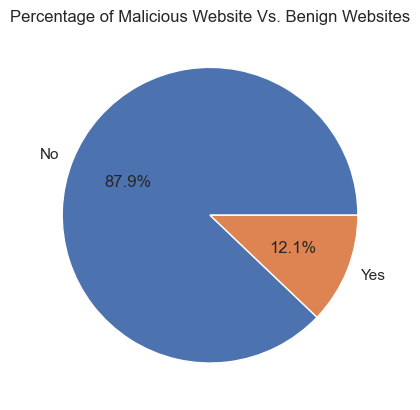

In [22]:
# Plot a pie chart for the class distribution
plt.pie(url_df_clean['type'].value_counts(),labels=['No','Yes'],autopct='%1.1f%%')
plt.title('Percentage of Malicious Website Vs. Benign Websites', fontsize=12);


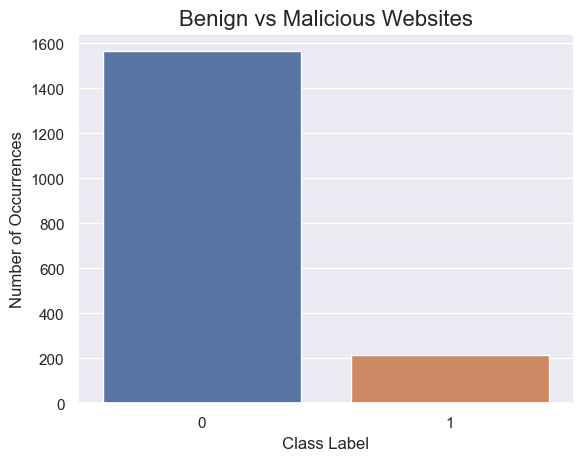

<Figure size 1600x600 with 0 Axes>

In [23]:
sns.countplot(x='type', data=url_df_clean);
plt.title('Benign vs Malicious Websites',fontsize=16);
plt.ylabel('Number of Occurrences',fontsize=12);
plt.xlabel('Class Label',fontsize=12);
plt.figure(figsize=(16, 6));

It is obvious from the above that the `class label` in the dataset (`type`) is biased, as only `12.1%` of the websites appears to be `Malicious Websites`, while `87.9%` is `Benign Websites`. <br>
Proceeding with this statistics will eventually produce a bias model. In order to overcome this, there will be need to perform `Model Extrapolation` using `Synthetic Minority Oversampling Technique (SMOTE)`.

Basically, `SMOTE` is a resampling technique which oversamples the minority class by `synthesizing` various parameters and creating new data points by using various `data augmentation` techniques. By this, enough numbers of the minority class data points will be produced to sufficiently carry out the learning processes for the machine learning model.

<a id='mlapplication'></a>
### Machine Learning Application
> This section detailed the application of machine learning techniques in the project, ranging from `feature engineering`, `model building`, `model training` `prediction` , `metrics scores`, `confusion matrix` among others.

#### Feature Engineering
> This process involve seprating independent features from dependent or terget variable.

In [24]:
# Divide the dataset into independent features and target variable
X = url_df_clean.drop('type', axis=1)
y = url_df_clean['type']

In [25]:
# Import the SMOTE function 
from imblearn.over_sampling import SMOTE
# Importing the Under Sampling function
from imblearn.under_sampling import RandomUnderSampler 

In [26]:
under_sample = RandomUnderSampler(sampling_strategy=0.5)

In [27]:
from imblearn.pipeline import Pipeline # Importing the pipeline 

In [28]:
"""
Initializing the SMOTE function. Set SMOTE function to oversample the minority to the number equal to the majority class. 
Then, take 50% of the oversampled minority class (randomly sampled).
"""
over_sample = SMOTE(sampling_strategy=0.5)

In [29]:
"""
Steps for pipelining
First "do oversampling of the minority class" and then do "undersampling of the majority class"
"""
pipeline_steps = [('o', over_sample),('u', under_sample)] 


In [30]:
# Create an instance of the pipline
pipeline = Pipeline(steps=pipeline_steps)

In [31]:
# Fitting the pipeline to the dataset
X_smote, y_smote = pipeline.fit_resample(X,y)

In [32]:
#  Check value counts of the target feature
y_smote.value_counts()

0    1564
1     782
Name: type, dtype: int64

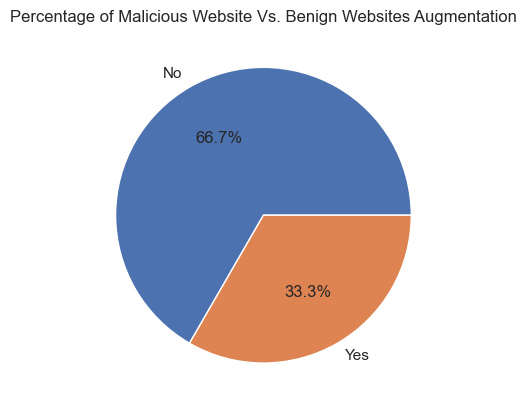

In [33]:
# Visualize the percentage ratio of the class labels
y_smote.value_counts().plot(kind='pie', labels=['No','Yes'], autopct='%1.1f%%');
plt.title('Percentage of Malicious Website Vs. Benign Websites Augmentation', fontsize=12);
plt.ylabel('');

Now that the data augmentation has been implemented using `SMOTE`, it is time to start the modeling. 

In [34]:
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,fbeta_score,make_scorer,precision_score,recall_score 
from sklearn.model_selection import train_test_split, cross_val_score,cross_validate 
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Decision Tree Algorithm

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
# Create Decision Tree classifer object
decision_tree_model = DecisionTreeClassifier()
# Train Decision Tree Classifer
decision_tree_model.fit(X_train, y_train)
# Predict the response on test data
y_pred = decision_tree_model.predict(X_test)
# Model Accuracy and other metrics, how often is the classifier correct?
print("Accuracy is", metrics.accuracy_score(y_test,y_pred))
print("Recall is ", metrics.recall_score(y_test,y_pred))
print('Precision is', metrics.precision_score(y_test,y_pred))
print("F-1 Score is", metrics.f1_score(y_test,y_pred))


Accuracy is 0.9355742296918768
Recall is  0.7333333333333333
Precision is 0.75
F-1 Score is 0.7415730337078651


#### Confusion Matrix For Decision Tree Algorithm


In [37]:
confusion_matrix_dtc = metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix_dtc)

[[301  11]
 [ 12  33]]


Visualising the confusion matrix above would give a better presentation.

In [38]:
plt.clf()

<Figure size 640x480 with 0 Axes>

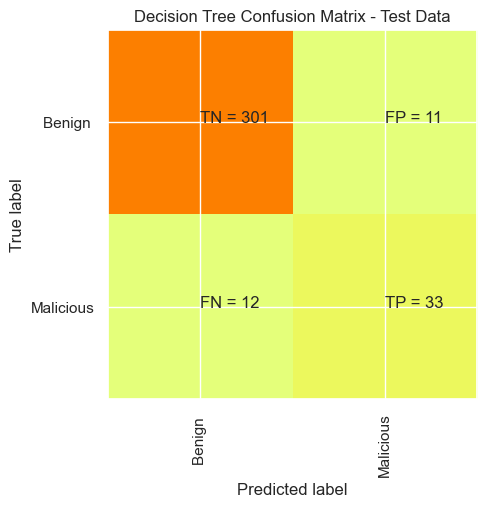

In [39]:
# Plotting the confusion matrix for Decision Tree Algorithm
plt.clf()
classNames = ["Benign ", "Malicious"]
plt.imshow(confusion_matrix_dtc, interpolation='nearest', cmap=plt.cm.Wistia)
plt.title('Decision Tree Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)
v = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(v[i][j])+" = "+str(confusion_matrix_dtc[i][j]))
plt.show()

### XGBoost Algorithm

In [40]:
import xgboost as xgb
from xgboost import XGBClassifier

In [41]:
# Create XGBoost classifer object
xgb_model = XGBClassifier()
# Train XGBoost Classifer
xgb_model.fit(X_train, y_train)
# Predict the response on test data
y_pred = xgb_model.predict(X_test)
# Model Accuracy and other metrics, how often is the classifier correct?
print("Accuracy is", metrics.accuracy_score(y_test,y_pred))
print("Recall is ", metrics.recall_score(y_test,y_pred))
print('Precision is', metrics.precision_score(y_test,y_pred))
print("F-1 Score is", metrics.f1_score(y_test,y_pred))

Accuracy is 0.9635854341736695
Recall is  0.7777777777777778
Precision is 0.9210526315789473
F-1 Score is 0.8433734939759038


#### Confusion Matrix For XGBoost Algorithm

In [42]:
confusion_matrix_xgb = metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix_xgb)

[[309   3]
 [ 10  35]]


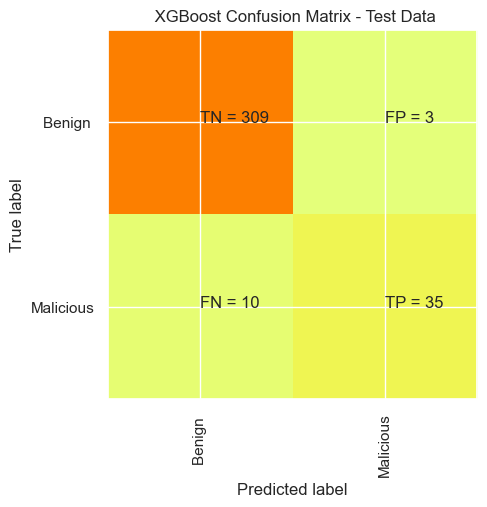

In [43]:
# Plotting the confusion matrix for Decision Tree Algorithm
plt.clf()
classNames = ["Benign ", "Malicious"]
plt.imshow(confusion_matrix_xgb, interpolation='nearest', cmap=plt.cm.Wistia)
plt.title(' XGBoost Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)
v = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(v[i][j])+" = "+str(confusion_matrix_xgb[i][j]))
plt.show()

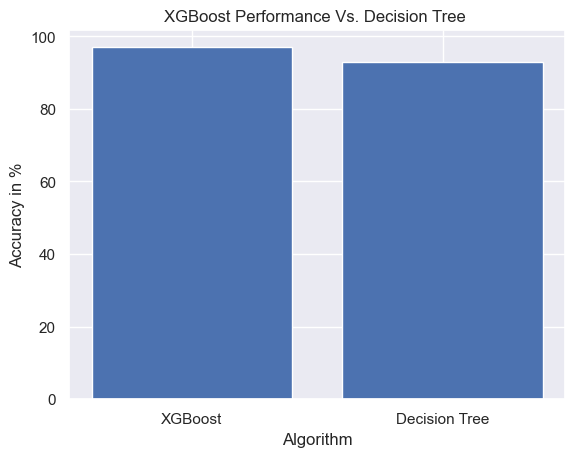

In [44]:
x = np.array(['XGBoost', 'Decision Tree'])
y = np.array([97, 93])
plt.bar(x,y)
plt.title("XGBoost Performance Vs. Decision Tree ")
plt.ylabel("Accuracy in %")
plt.xlabel("Algorithm")
plt.show()

It can be oberved from the bar chart above that `XGBoost algorithm` have higher accuracy with `96%`, while `Decision Tree` have the `94%` accuracy.

### Correlation Among The Features

In [45]:
# Check for correlation 
url_df_clean.corr()

,url_length,number_special_characters,content_length,tcp_conversation_exchange,dist_remote_tcp_port,remote_ips,app_bytes,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,app_packets,dns_query_times,type
url_length,1.000000,0.917986,0.088854,-0.038407,-0.039839,-0.046367,-0.026446,-0.042264,-0.033779,-0.014857,-0.026686,-0.042264,-0.068533,0.162104
number_special_characters,0.917986,1.000000,0.143130,-0.037459,-0.042619,-0.047103,-0.023914,-0.040096,-0.030597,-0.014376,-0.024098,-0.040096,-0.050038,0.280897
content_length,0.088854,0.143130,1.000000,0.064416,-0.000089,0.003500,0.002642,0.060455,0.072362,0.083833,0.002514,0.060455,-0.032391,-0.064073
tcp_conversation_exchange,-0.038407,-0.037459,0.064416,1.000000,0.555188,0.331080,0.457320,0.997796,0.990848,0.865580,0.458702,0.997796,0.349823,-0.040202
dist_remote_tcp_port,-0.039839,-0.042619,-0.000089,0.555188,1.000000,0.210188,0.780238,0.558612,0.591188,0.313359,0.781212,0.558612,0.259941,-0.082925
remote_ips,-0.046367,-0.047103,0.003500,0.331080,0.210188,1.000000,0.023126,0.361104,0.304683,0.171651,0.025324,0.361104,0.548174,-0.078783
app_bytes,-0.026446,-0.023914,0.002642,0.457320,0.780238,0.023126,1.000000,0.445822,0.468999,0.074464,0.999992,0.445822,0.012221,-0.011262
source_app_packets,-0.042264,-0.040096,0.060455,0.997796,0.558612,0.361104,0.445822,1.000000,0.989285,0.857495,0.447448,1.000000,0.410829,-0.034414
remote_app_packets,-0.033779,-0.030597,0.072362,0.990848,0.591188,0.304683,0.468999,0.989285,1.000000,0.880555,0.470401,0.989285,0.355708,-0.032897
source_app_bytes,-0.014857,-0.014376,0.083833,0.865580,0.313359,0.171651,0.074464,0.857495,0.880555,1.000000,0.075328,0.857495,0.215282,-0.043852


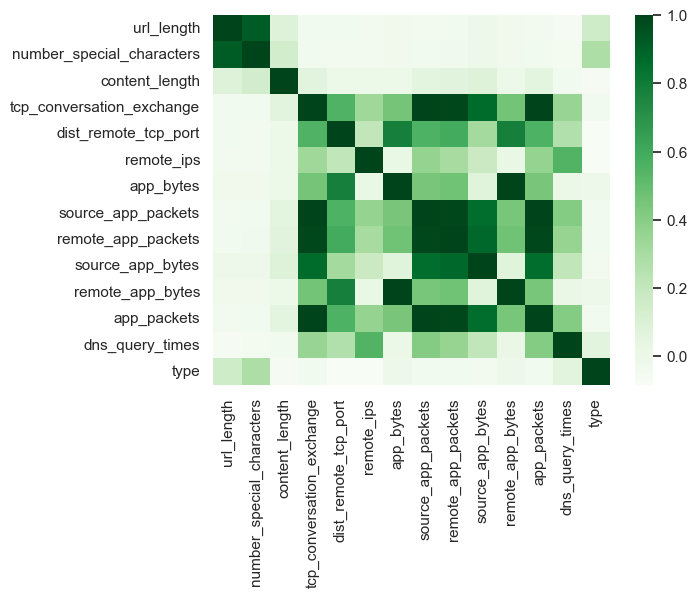

In [46]:
# Visualise the correlation 
sns.heatmap(url_df_clean.corr(), cmap='Greens');
plt.xticks(rotation=90);

It can be deduced from the heatmap above that there is a positive strong correlation between `number_special_characters` and `url_length` with correlation value of `0.917986`, also there is strong positve correlation between `tcp_conversation_exchange` and `remote_app_packets` with correlation value of `0.990848`. There is also a strong positive correlation between `app_bytes` and `remote_app_bytes` with correlation value of `0.999992`.

<a id='conclusion'></a>
### Conclusion 
> This research has leverage on the power of `Machine Learning` to classified website to either `Malicious` or `Benign `. Analysis revealed that the target label (`type`) has data imbalance as 12.1% of the dataset is `Malicious Websites`, while 87.9% is `Benign Websites`, this data imbalance was solved using `Synthetic Minority Oversampling Technique (SMOTE)` for data augmentations.<br>
> Positive strong correlations was observed among some of the features such as; `number_special_characters` and `url_length`,  `tcp_conversation_exchange` and `remote_app_packets`,  `app_bytes` and `remote_app_bytes` among others.<br>
> `Decision Tree` and `XGBoost` algorithms were used, and XGBoost performed better with accuracy of `96%`, while `Decision Tree` have an accuracy of `94%`.


In [47]:
# !jupyter nbconvert Predicting-Malicious-Websites-Using-ML-Techniques.ipynb --to slides --template output-toggle.tpl --post serve --no-input --no-prompt
     